# DATA COLLECTION

### DOWLOADING DATA FROM KAGGLE

In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle   #mkdir creates a new directory in the specified path

### DOWLOADING KAGGLE API TO SPECIFIED LOCATION

In [3]:
import json

# writing the data to be written inside json file
data = {"username":"chittamurunikhil","key":"1d277463676fb731b9cda62a8cc7b206"}

#specifying the kaggle folder to create a json file for kaggle
destination = '/root/.kaggle/kaggle.json'

# Convert the data to a JSON string
json_data = json.dumps(data)

# Use the echo command to write the JSON string to the file
!echo '{json_data}' > {destination}   # > ---- is redirection operator

In [4]:
!cd /root/.kaggle && ls #!cd ~/.kaggle && ls   #ls shows all the list of files in the specified directory

kaggle.json


In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets list -s "mango"    # -s is for search

ref                                                      title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mohdnazuan/harumanis-mango-physical-measurement          Harumanis Mango Physical Measurements              2KB  2023-03-02 22:45:16            483         19  1.0              
aryashah2k/mango-leaf-disease-dataset                    Mango🥭 Leaf🍃🍂 Disease Dataset                    103MB  2023-04-14 10:33:45            857         36  1.0              
karimabdulnabi/fruit-classification10-class              Fruit classification(10 Class)                    29MB  2022-10-06 23:59:58           2832         57  0.875            
dalipkamboj/mango-leaf-species-indian                    Mango Leaf Species (Indian)                      154M

In [7]:
# import pandas as pd

In [8]:
# data = !kaggle datasets list -s "cotton"

In [9]:
# pathvar = "alinedobrovsky/plant-disease-classification-merged-dataset"
# datasetname =pathvar.split("/")
# filename = datasetname[-1] + ".zip"
# filename

In [10]:
!kaggle datasets download -d "alinedobrovsky/plant-disease-classification-merged-dataset"  # -d is for download

100% 17.3G/17.3G [03:52<00:00, 131MB/s]
100% 17.3G/17.3G [03:52<00:00, 80.0MB/s]


In [11]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [12]:
!unzip plant-disease-classification-merged-dataset.zip -d /content/dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Tomato__yellow_leaf_curl_virus/4adc4360-b4da-4955-adb4-6f7d52f1c890___UF.GRC_YLCV_Lab 02752.JPG  
  inflating: /content/dataset/Tomato__yellow_leaf_curl_virus/4adc46cc-60dd-48a7-8d4c-f6394577a14a___UF.GRC_YLCV_Lab 01543.JPG  
  inflating: /content/dataset/Tomato__yellow_leaf_curl_virus/4ae10eb4-cd1f-490e-9ffe-61e348dad2b9___YLCV_GCREC 2785.JPG  
  inflating: /content/dataset/Tomato__yellow_leaf_curl_virus/4ae45072-4db3-477d-9ace-9a08ce483d46___UF.GRC_YLCV_Lab 01407.JPG  
  inflating: /content/dataset/Tomato__yellow_leaf_curl_virus/4ae66de5-2a7a-41bf-b0c3-7c00d2ce3b21___UF.GRC_YLCV_Lab 02136.JPG  
  inflating: /content/dataset/Tomato__yellow_leaf_curl_virus/4af9c16d-2976-48f1-bb9a-bf7a3137488a___UF.GRC_YLCV_Lab 03352.JPG  
  inflating: /content/dataset/Tomato__yellow_leaf_curl_virus/4b0733bc-70fa-46f7-9861-b135a461b67f___YLCV_GCREC 2397.JPG  
  inflating: /content/dataset/Tomato__yellow_leaf_curl_virus/4b2c

# DATA LOADING

In [13]:
#IMPORTING DATA HANDLING LIBRARIES
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
#setting style to seaborn
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# # IMPORTING DEEPLEARNING LIBRARIES
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam, Adamax
# from tensorflow.keras.metrics import categorical_crossentropy

In [15]:
# IMPORTING DEEPLEARNING LIBRARIES
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam, Adamax
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras import regularizers

#IMPORTING WARNINGS
import warnings
warnings.filterwarnings("ignore")

In [16]:
print(keras.layers.MaxPool2D.__doc__)

Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output,
    when using the `"valid"` padding option, has a spatial shape
    (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    For example, for `strides=(1, 1)` and `padding="valid"`:

    >>> x = tf.constant([[1., 2., 3.],
    ...                  [4., 5., 6.],
    ...                  [7., 8., 9.]])
    >>> x = tf.reshape(x, [1, 3, 3, 1])
    >>> max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
    ...    strides=(1, 1), padd

In [17]:
#IMPORTING SYSTEM LIBRARIES
from pathlib import Path
import os
import time
import shutil
import itertools

In [18]:
#IMPORTING METRICS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools

In [19]:
path = "/content/dataset"

In [20]:
lisofplants = os.listdir(path)
lisofplants.sort()
lisofplants

['Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
 'Cassava__bacterial_blight',
 'Cassava__brown_streak_disease',
 'Cassava__green_mottle',
 'Cassava__healthy',
 'Cassava__mosaic_disease',
 'Cherry__healthy',
 'Cherry__powdery_mildew',
 'Chili__healthy',
 'Chili__leaf curl',
 'Chili__leaf spot',
 'Chili__whitefly',
 'Chili__yellowish',
 'Coffee__cercospora_leaf_spot',
 'Coffee__healthy',
 'Coffee__red_spider_mite',
 'Coffee__rust',
 'Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Corn__northern_leaf_blight',
 'Cucumber__diseased',
 'Cucumber__healthy',
 'Gauva__diseased',
 'Gauva__healthy',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
 'Jamun__diseased',
 'Jamun__healthy',
 'Lemon__diseased',
 'Lemon__healthy',
 'Mango__diseased',
 'Mango__healthy',
 'Peach__bacterial_spot',
 'Peach__healthy',
 'Pepper_bell__bacterial_spot',
 'Pepper_bell__healthy',
 'Pomegranate__diseased',
 'Pome

# DATA CLEANING AND PREPROCESSING

In [21]:
training_data_folders = [
#   'Apple__black_rot',
#  'Apple__healthy',
#  'Apple__rust',
#  'Apple__scab',
#  'Cassava__bacterial_blight',
#  'Cassava__brown_streak_disease',
#  'Cassava__green_mottle',
#  'Cassava__healthy',
#  'Cassava__mosaic_disease',
#  'Cherry__healthy',
#  'Cherry__powdery_mildew',
 'Chili__healthy',
 'Chili__leaf curl',
 'Chili__leaf spot',
 'Chili__whitefly',
 'Chili__yellowish',
#  'Coffee__cercospora_leaf_spot',
#  'Coffee__healthy',
#  'Coffee__red_spider_mite',
#  'Coffee__rust',
#  'Corn__common_rust',
#  'Corn__gray_leaf_spot',
#  'Corn__healthy',
#  'Corn__northern_leaf_blight',
#  'Cucumber__diseased',
#  'Cucumber__healthy',
#  'Gauva__diseased',
#  'Gauva__healthy',
#  'Grape__black_measles',
#  'Grape__black_rot',
#  'Grape__healthy',
#  'Grape__leaf_blight_(isariopsis_leaf_spot)',
#  'Jamun__diseased',
#  'Jamun__healthy',
 'Lemon__diseased',
 'Lemon__healthy',
#  'Mango__diseased',
#  'Mango__healthy',
#  'Peach__bacterial_spot',
#  'Peach__healthy',
#  'Pepper_bell__bacterial_spot',
#  'Pepper_bell__healthy',
#  'Pomegranate__diseased',
#  'Pomegranate__healthy',
 'Potato__early_blight',
 'Potato__healthy',
 'Potato__late_blight',
 'Rice__brown_spot',
 'Rice__healthy',
 'Rice__hispa',
 'Rice__leaf_blast',
 'Rice__neck_blast',
#  'Soybean__bacterial_blight',
#  'Soybean__caterpillar',
#  'Soybean__diabrotica_speciosa',
#  'Soybean__downy_mildew',
#  'Soybean__healthy',
#  'Soybean__mosaic_virus',
#  'Soybean__powdery_mildew',
#  'Soybean__rust',
#  'Soybean__southern_blight',
#  'Strawberry___leaf_scorch',
#  'Strawberry__healthy',
#  'Sugarcane__bacterial_blight',
#  'Sugarcane__healthy',
#  'Sugarcane__red_rot',
#  'Sugarcane__red_stripe',
#  'Sugarcane__rust',
#  'Tea__algal_leaf',
#  'Tea__anthracnose',
#  'Tea__bird_eye_spot',
#  'Tea__brown_blight',
#  'Tea__healthy',
#  'Tea__red_leaf_spot',
 'Tomato__bacterial_spot',
 'Tomato__early_blight',
 'Tomato__healthy',
 'Tomato__late_blight',
 'Tomato__leaf_mold',
 'Tomato__mosaic_virus',
 'Tomato__septoria_leaf_spot',
 'Tomato__spider_mites_(two_spotted_spider_mite)',
 'Tomato__target_spot',
 'Tomato__yellow_leaf_curl_virus',
#  'Wheat__brown_rust',
#  'Wheat__healthy',
#  'Wheat__septoria',
#  'Wheat__yellow_rust'
 ]

In [22]:
for i in training_data_folders:
  print(i)

Chili__healthy
Chili__leaf curl
Chili__leaf spot
Chili__whitefly
Chili__yellowish
Lemon__diseased
Lemon__healthy
Potato__early_blight
Potato__healthy
Potato__late_blight
Rice__brown_spot
Rice__healthy
Rice__hispa
Rice__leaf_blast
Rice__neck_blast
Tomato__bacterial_spot
Tomato__early_blight
Tomato__healthy
Tomato__late_blight
Tomato__leaf_mold
Tomato__mosaic_virus
Tomato__septoria_leaf_spot
Tomato__spider_mites_(two_spotted_spider_mite)
Tomato__target_spot
Tomato__yellow_leaf_curl_virus


In [23]:
image_dir = Path(path)

#get file paths and labels

list_file_paths = list(image_dir.glob(r"**/*.JPG")) +  list(image_dir.glob(r"**/*.jpg")) + list(image_dir.glob(r"**/*.PNG")) + list(image_dir.glob(r"**/*.png"))
print(len(list_file_paths))

list_labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1],list_file_paths))

print(len(list_labels))

filepaths = pd.Series(list_file_paths, name = "filepaths").astype(str)
labels = pd.Series(list_labels, name = "labels")

images_df = pd.concat([filepaths,labels],axis = 1)
print(images_df.head())

79084
79084
                                           filepaths                labels
0  /content/dataset/Pomegranate__healthy/0009_025...  Pomegranate__healthy
1  /content/dataset/Pomegranate__healthy/0009_003...  Pomegranate__healthy
2  /content/dataset/Pomegranate__healthy/0009_026...  Pomegranate__healthy
3  /content/dataset/Pomegranate__healthy/0009_009...  Pomegranate__healthy
4  /content/dataset/Pomegranate__healthy/0009_021...  Pomegranate__healthy


In [24]:
#filtering the original data frame of images
images_df = images_df[images_df["labels"].isin(training_data_folders)]

In [25]:
len(images_df)

23840

In [26]:
len(images_df['labels'].unique())

25

In [27]:
image_df = images_df.reset_index()

# DATA VISUALIZATION

In [28]:
# # Display 20 picture of the dataset with their labels
# random_index = np.random.randint(0, len(image_df), 25)
# fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
#                         subplot_kw={'xticks': [], 'yticks': []})

# for i, ax in enumerate(axes.flat):
#     ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
#     ax.set_title(image_df.Label[random_index[i]])
# # plt.tight_layout()
# plt.show()

# FEATURE ENGINEERING

In [29]:
#SPLIT DATA TO TRAIN, TEST, VALID
def split_data():
    # train dataframe
    df= image_df
    strat = df['labels']
    train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

    # valid and test dataframe
    strat = dummy_df['labels']
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)

    return train_df, valid_df, test_df

In [30]:
train_df,valid_df, test_df = split_data()

# DATA AUGMENTATION

In [31]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

In [32]:
# dir(tf.keras.preprocessing.image.ImageDataGenerator())

In [33]:
# print(tf.keras.preprocessing.image.ImageDataGenerator().__doc__)

In [34]:
def create_gens (train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors. '''


    # define model parameters
    img_size = (224, 224)
    channels = 3 # either BGR or Grayscale
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    # Recommended : use custom function for test data batch size, else we can use normal batch size.
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function which will be used in image data generator for data augmentation, it just take the image and return it again.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)

    train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    # Note: we will use custom test_batch_size, and make shuffle= false
    test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= False, batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

In [35]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

# MODEL FITTING

In [36]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights if they have to get restored

    # Define a function that will run when train begins
    def on_train_begin(self, logs= None):
        msg = 'Do you want model asks you to halt the training [y/n] ?'
        print(msg)
        ans = input('')
        if ans in ['Y', 'y']:
            self.ask_permission = 1
        elif ans in ['N', 'n']:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()


    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        # set the weights of the model to the best weights
        self.model.set_weights(self.best_weights)


    def on_train_batch_end(self, batch, logs= None):
        # get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()


    # Define method runs on the end of each epoch
    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        loss = logs.get('loss')  # get training loss for this epoch
        v_loss = logs.get('val_loss')  # get the validation loss for this epoch

        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc # define improvement of model progres

            if acc > self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc = acc # set new highest training accuracy
                self.best_weights = self.model.get_weights() # training accuracy improved so save the weights
                self.count = 0 # set count to 0 since training accuracy improved
                self.stop_count = 0 # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # set the value of best epoch for this epoch

            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count >= self.patience - 1: # lr should be adjusted
                    lr = lr * self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count = 0 # reset the count to 0
                    self.stop_count = self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count = 0 # reset counter
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1 # increment patience counter

        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0

            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss

            if v_loss < self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss = v_loss # replace lowest validation loss with new validation loss
                self.best_weights = self.model.get_weights() # validation loss improved so save the weights
                self.count = 0 # reset count since validation loss improved
                self.stop_count = 0
                self.best_epoch = epoch + 1 # set the value of the best epoch to this epoch

            else: # validation loss did not improve
                if self.count >= self.patience - 1: # need to adjust lr
                    lr = lr * self.factor # adjust the learning rate
                    self.stop_count = self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count = 0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer

                else:
                    self.count = self.count + 1 # increment the patience counter

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True # stop training

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'enter H to halt training or an integer for number of epochs to run then ask again'
                    print(msg)

                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'training has been halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True # stop training

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)

                        except Exception:
                            print('Invalid')

# PLOTTING TRAINING


In [37]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    Epochs = [i+1 for i in range(len(tr_acc))]

    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

# STRUCTURING MODEL

In [38]:

# try:
# Get splitted data
train_df, valid_df, test_df = split_data()

# Get Generators
batch_size = 40
train_gen, valid_gen, test_gen = create_gens(train_df, valid_df, test_df, batch_size)

# except:
#     print('Invalid Input')

Found 19072 validated image filenames belonging to 25 classes.
Found 2384 validated image filenames belonging to 25 classes.
Found 2384 validated image filenames belonging to 25 classes.


In [39]:
len(train_gen)

477

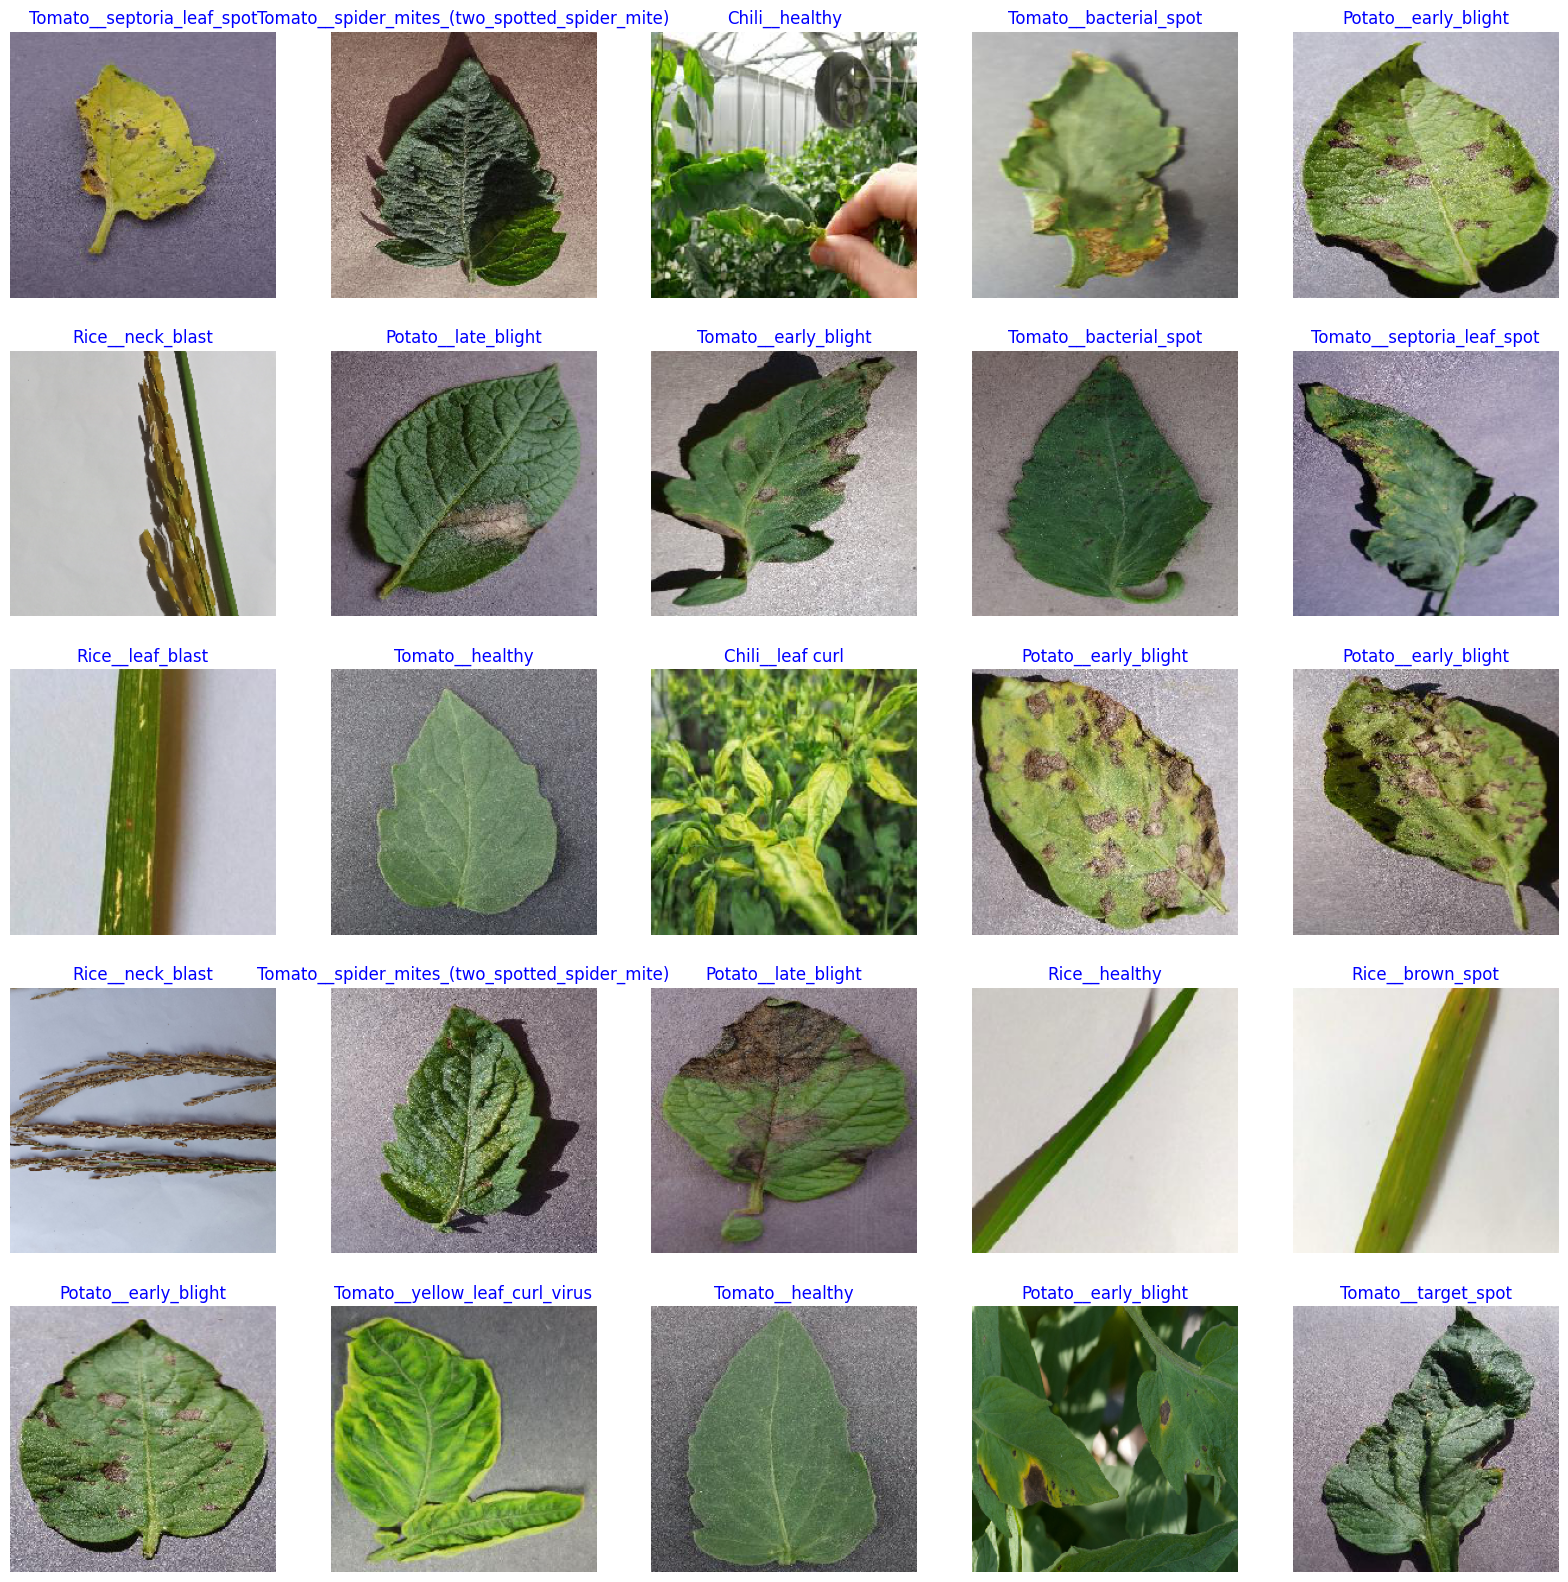

In [40]:
show_images(train_gen)

### Generic Model Creation

In [41]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 25)                6425      
                                                                 
Total params: 11,189,576
Trainable params: 11,099,201
Non

### setting callbacks parameters

In [42]:
batch_size = 40   # set batch size for training
epochs = 40   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(model= model, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

### Training The Model

In [ ]:
history = model.fit(x= train_gen, epochs= epochs, verbose= 0, callbacks= callbacks,
                    validation_data= valid_gen, validation_steps= None, shuffle= False)

Do you want model asks you to halt the training [y/n] ?
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration


In [ ]:
# display model performance
plot_training(history)

# Evaluate the Model

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

# PREDICTION SECTION

In [ ]:
# preds = model.predict_generator(test_gen)
# y_pred = np.argmax(preds, axis=1)
# print(y_pred)

In [ ]:
# g_dict = test_gen.class_indices
# classes = list(g_dict.keys())

# # Classification report
# print(classification_report(test_gen.classes, y_pred, target_names= classes))

# CV2 FOR CAMERA CALLING